In [1]:
import glob
import os

import pandas as pd
import pickle
import sktensor

from eval_tensor import consistent_name_d

import matplotlib.pyplot as plt
%pylab inline

pylab.rcParams['figure.figsize'] = (20, 10)
matplotlib.rcParams.update({'font.size': 14})
from tikzplotlib import save as tikz_save

import logging
logging.basicConfig(level=logging.INFO, 
                    format='%(msecs)d %(levelname)-8s [%(lineno)d] %(message)s')

if not os.path.exists('cp_orth.py'):
    wget.download('http://web.stanford.edu/~vsharan/cp_orth.py')
#from cp_orth import orth_als

DEBUG    [276] $HOME=/home/makrai
DEBUG    [276] CONFIGDIR=/home/makrai/.config/matplotlib
DEBUG    [276] matplotlib data path: /home/makrai/tool/python/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data
DEBUG    [1007] loaded rc file /home/makrai/tool/python/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc
DEBUG    [1644] matplotlib version 3.1.3
DEBUG    [1645] interactive is False
DEBUG    [1646] platform is linux
DEBUG    [1647] loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'site', 'os', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'types', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings'

DEBUG    [276] CACHEDIR=/home/makrai/.cache/matplotlib
DEBUG    [1360] Using fontManager instance from /home/makrai/.cache/matplotlib/fontlist-v310.json
DEBUG    [225] Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG    [225] Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG    [225] Loaded backend module://ipykernel.pylab.backend_inline version unknown.


Populating the interactive namespace from numpy and matplotlib


In [2]:
projdir = '/mnt/permanent/home/makrai/project/verb-tensor/verb/'

def get_df():
    tabular = []
    mx = []
    for filen in glob.glob(os.path.join(projdir, 'tensor/0to4/ktensor_*.pkl')):
        weight, cutoff, dim = os.path.splitext(os.path.basename(filen))[0].rsplit('_', 2)
        _, weight = weight.split('_', 1)
        cutoff, dim = map(int, (cutoff, dim))
        ktensor, fit, n_iterations, exectimes = pickle.load(open(filen, mode='rb'))
        
        tabular.append((consistent_name_d[weight], cutoff, dim, ktensor.shape, fit, n_iterations, sum(exectimes)))
    return pd.DataFrame(tabular, columns=['weight', 'cutoff', 'dim', 'shape', 'fit', 'n_iterations', 'time'])

In [3]:
df = get_df()

In [4]:
cutoff = 20
dim = 256

In [5]:
weights = df[(df.dim==dim)&(df.cutoff==cutoff)].sort_values('fit', ascending=False).weight.values

TypeError: get_tikz_code() got an unexpected keyword argument 'figurewidth'

DEBUG    [2303] vmin 1.5691681957935015 vmax 326.287520593731
DEBUG    [2354] ticklocs array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])
DEBUG    [2303] vmin 1.5691681957935015 vmax 326.287520593731
DEBUG    [2354] ticklocs array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])
DEBUG    [2303] vmin 1.5691681957935015 vmax 326.287520593731
DEBUG    [2354] ticklocs array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])
DEBUG    [2303] vmin 1.5691681957935015 vmax 326.287520593731
DEBUG    [2354] ticklocs array([2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02,
       2.e+03, 3.e+03, 4.e+03, 5.e+03, 6.e+03, 7.e+03, 8.e+03, 9.e+03,
       2.e+04, 3.e+04, 4.e+04, 5.e+04, 6.e+04, 7.e+04, 8.e+04, 9.e+04])
DEBUG    [2303] vmin 1.5691681957935015 vmax 326.28752059

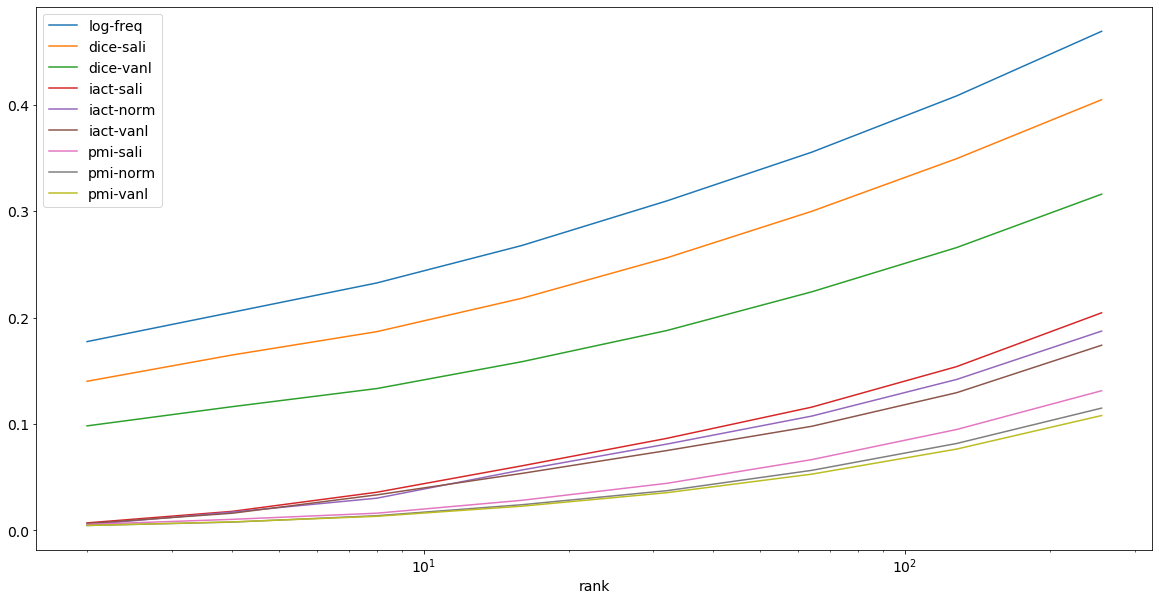

In [7]:
for weight in weights:
    df_w = df[(df.cutoff==cutoff) & (df.weight==weight) & (df.dim <= dim)].sort_values('dim', ascending=False)
    plt.plot(
        df_w.dim, 
        #df_w.n_iterations)#,
        #df_w.time/60/60)
        df_w.fit)
        
#for i, ser in df[['fit', 'time', 'weight']].iterrows():
#    plt.annotate(ser.weight, (ser.fit, ser.time))
#plt.colorbar()
plt.xlabel('rank')
plt.xscale('log')
_ = plt.legend(weights)
tikz_save(os.path.join(projdir, 'decomp_fit.tikz'), figurewidth = '\\columnwidth')